In [2]:
import pandas as pd

dataset link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
df = pd.read_csv('../Datasets/wine_quality/winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

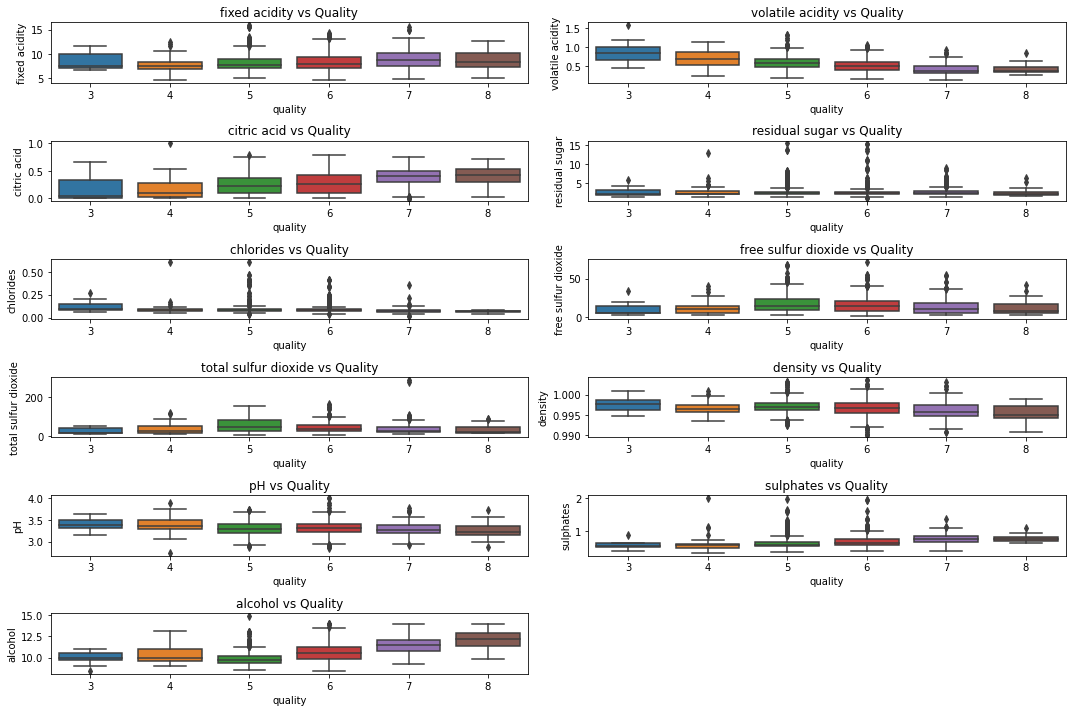

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o tamanho da figura
plt.figure(figsize=(15, 10))

# Criar subplots para cada feature
features = [col for col in df.columns if col != 'quality']
n_features = len(features)
n_rows = (n_features + 1) // 2  # Arredondar para cima para ter número par de subplots

# Plotar cada feature em um subplot
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, 2, i)
    sns.boxplot(x='quality', y=feature, data=df)
    plt.title(f'{feature} vs Quality')

# Ajustar o layout
plt.tight_layout()
plt.show()

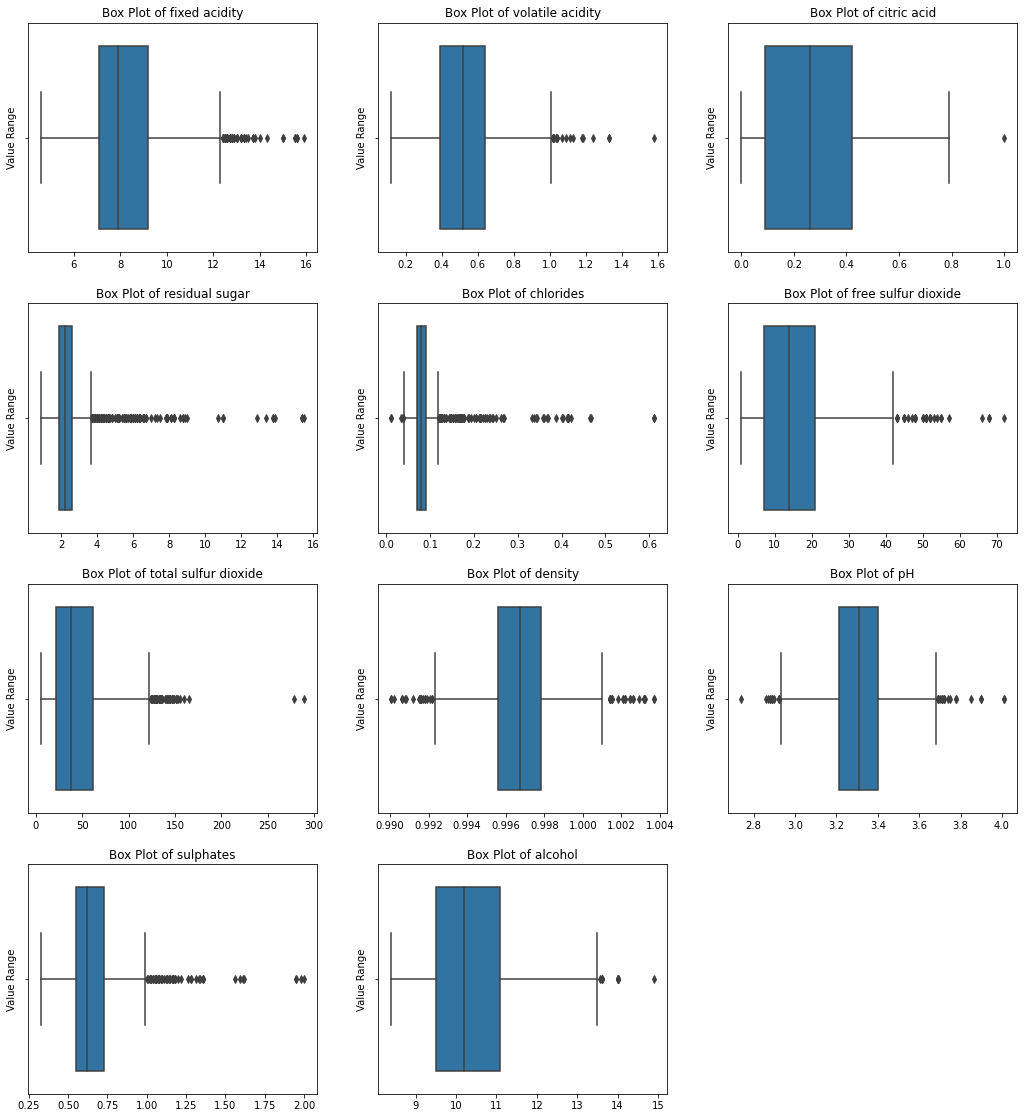

In [9]:
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(df.columns[:-1]):
    row, col = divmod(i, 3) 
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for j in range(len(df.columns) - 1, 12):
    fig.delaxes(axes[j // 3, j % 3])

plt.show()

In [10]:
df[df['total sulfur dioxide']>150].shape

(9, 12)

In [11]:
df[df['residual sugar']>9].shape


(11, 12)

In [12]:
df = df[df['total sulfur dioxide']<=150]
df = df[df['residual sugar']<=9]


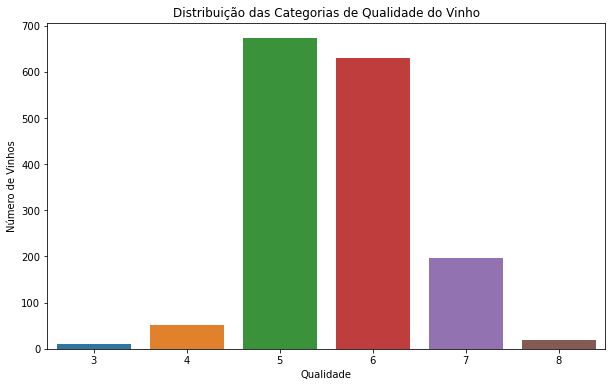

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality')
plt.title('Distribuição das Categorias de Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Número de Vinhos')
plt.show()


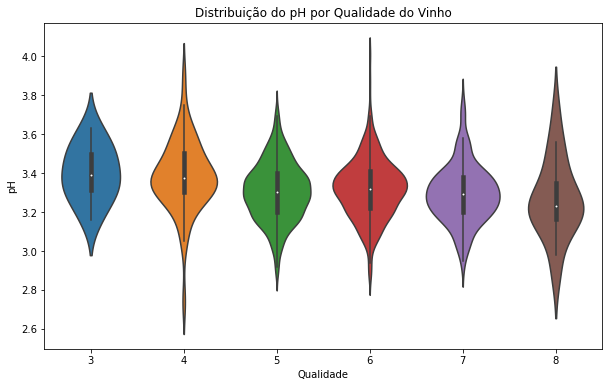

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='pH', data=df)
plt.title('Distribuição do pH por Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('pH')
plt.show()

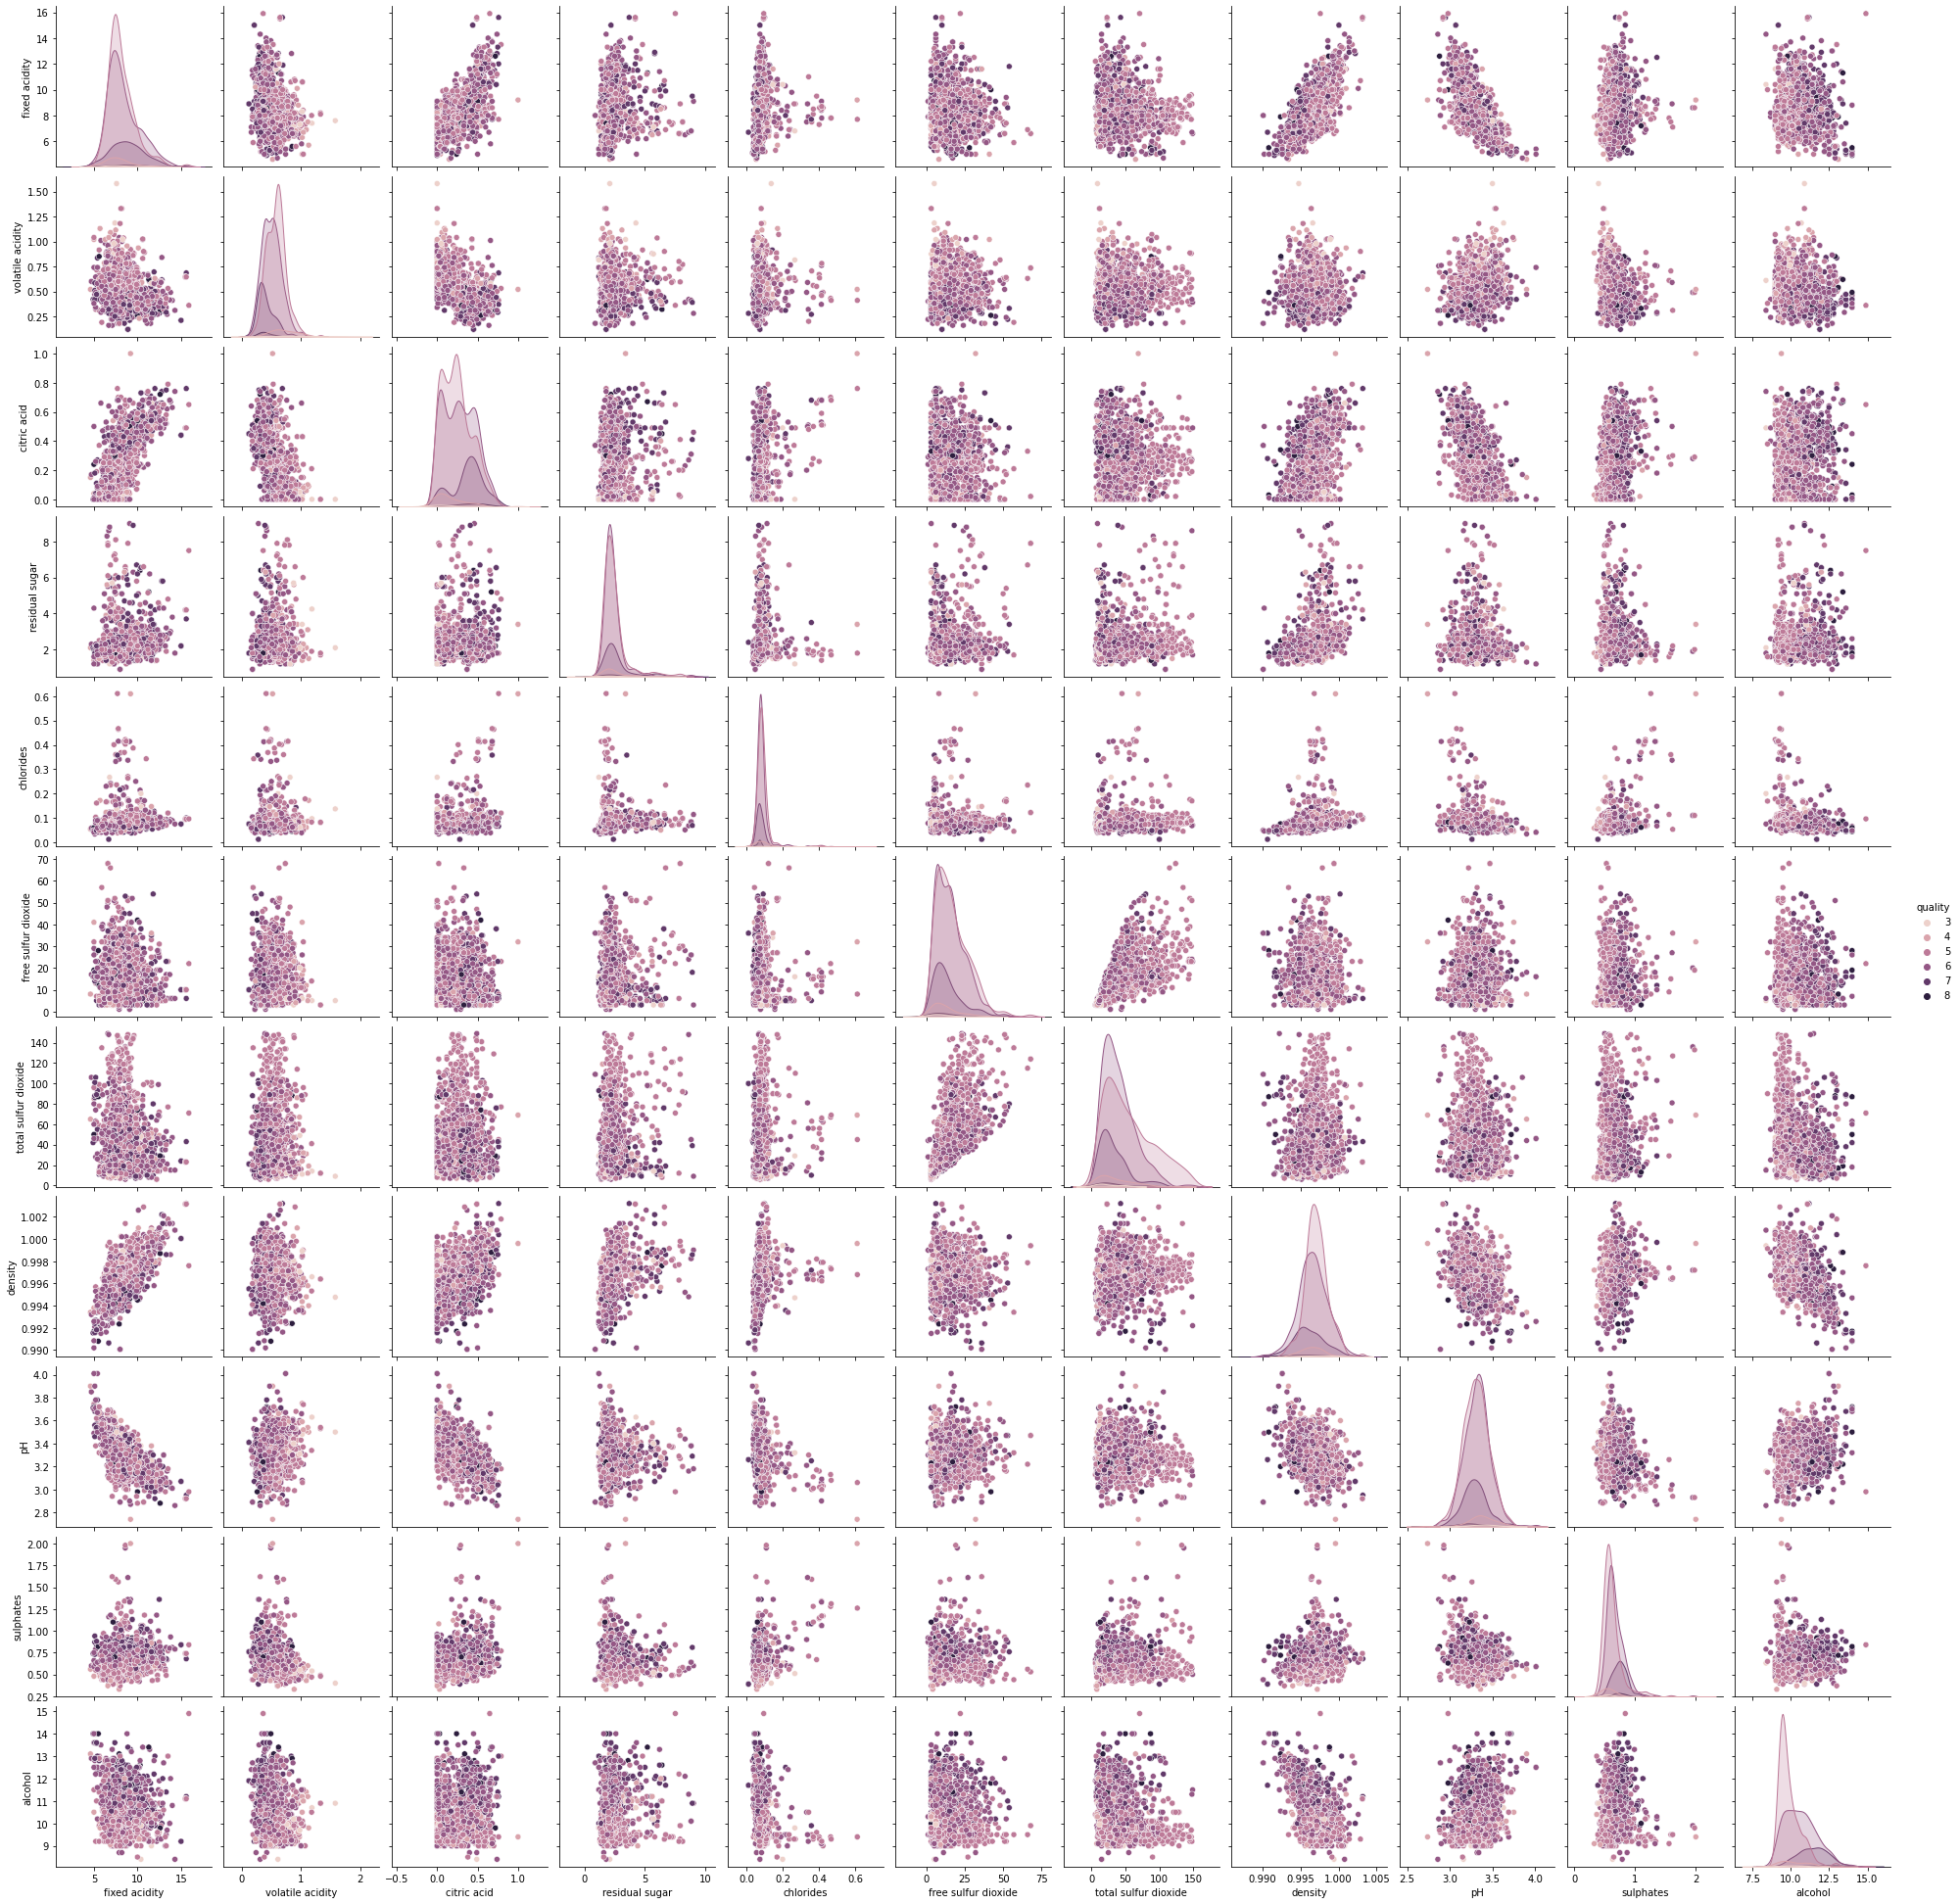

In [15]:
sns.pairplot(data=df, hue='quality')

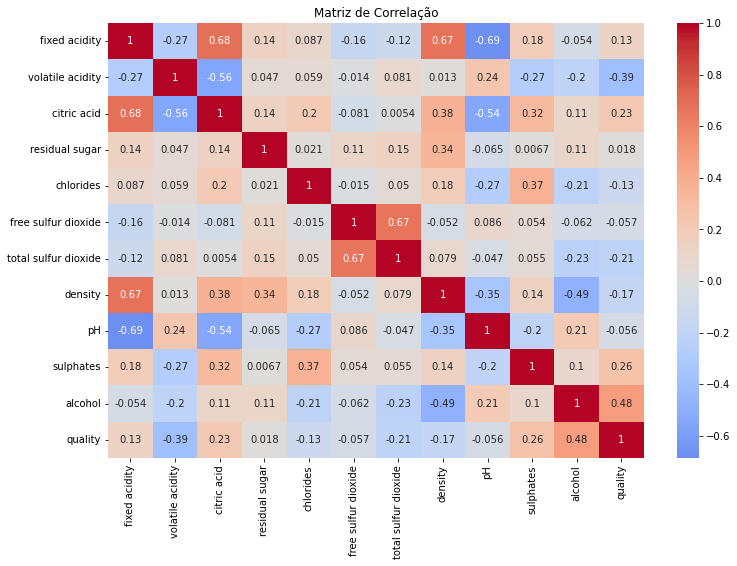

In [16]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


In [17]:
# 1. Criar uma nova feature que representa a proporção de sulfur dioxide livre
df['free_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']

# 2. Calcular o sulfur dioxide ligado (bound)
df['bound sulfur dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

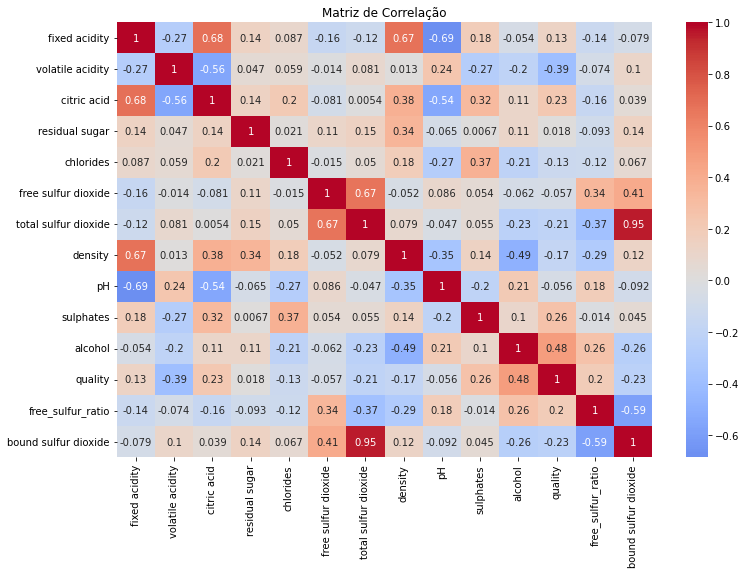

In [18]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()


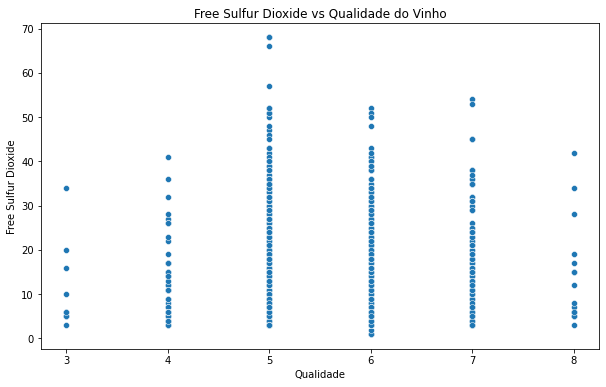

In [19]:
# Gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='free sulfur dioxide', data=df)
plt.title('Free Sulfur Dioxide vs Qualidade do Vinho')
plt.xlabel('Qualidade')
plt.ylabel('Free Sulfur Dioxide')
plt.show()

In [20]:
features_to_drop = ['free sulfur dioxide', 'total sulfur dioxide', 'bound sulfur dioxide']
df = df.drop(features_to_drop, axis=1)

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,free_sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5,0.323529
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,5,0.373134
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,5,0.277778
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,6,0.283333
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5,0.323529


In [22]:
y = df['quality'].values - 3
X = df.drop('quality', axis=1).values


In [23]:
X

array([[ 7.4       ,  0.7       ,  0.        , ...,  0.56      ,
         9.4       ,  0.32352941],
       [ 7.8       ,  0.88      ,  0.        , ...,  0.68      ,
         9.8       ,  0.37313433],
       [ 7.8       ,  0.76      ,  0.04      , ...,  0.65      ,
         9.8       ,  0.27777778],
       ...,
       [ 6.3       ,  0.51      ,  0.13      , ...,  0.75      ,
        11.        ,  0.725     ],
       [ 5.9       ,  0.645     ,  0.12      , ...,  0.71      ,
        10.2       ,  0.72727273],
       [ 6.        ,  0.31      ,  0.47      , ...,  0.66      ,
        11.        ,  0.42857143]])

In [24]:
y 

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

#Models

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
X_train

array([[ 0.33214685, -0.71621687,  0.25660741, ...,  0.63057859,
         0.05576689, -1.10777728],
       [-1.00881759,  0.81789782, -1.37689219, ..., -0.56286726,
         1.27352314,  1.09610691],
       [-0.56182944, -0.26166437,  0.25660741, ..., -0.05139047,
        -0.41260089,  1.25343525],
       ...,
       [-0.33833537,  1.0735836 , -1.32584532, ..., -0.50603651,
         1.27352314,  2.21316626],
       [-1.67929981, -0.31848343, -0.8153767 , ...,  1.25571689,
         2.95964716, -1.32337719],
       [-0.45008241, -0.6593978 , -0.61118925, ..., -0.44920575,
        -1.25566291, -0.48206883]])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [29]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [30]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [31]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [32]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.3987341772151899
For  KN
Accuracy -  0.629746835443038
For  DT
Accuracy -  0.6044303797468354
For  LR
Accuracy -  0.5981012658227848
For  RF
Accuracy -  0.7120253164556962
For  AdaBoost
Accuracy -  0.5348101265822784
For  BgC
Accuracy -  0.6962025316455697
For  ETC
Accuracy -  0.7278481012658228
For  GBDT
Accuracy -  0.6392405063291139
For  xgb
Accuracy -  0.7088607594936709


In [33]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)


In [34]:
performance_df

,Algorithm,Accuracy
7,ETC,0.727848
4,RF,0.712025
9,xgb,0.708861
6,BgC,0.696203
8,GBDT,0.639241
1,KN,0.629747
2,DT,0.604430
3,LR,0.598101
5,AdaBoost,0.534810
0,SVC,0.398734


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definir o espaço de busca dos hiperparâmetros
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 30)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Criar o modelo base
etc = ExtraTreesClassifier(random_state=42)

# Configurar e executar a busca randomizada
random_search = RandomizedSearchCV(
    estimator=etc,
    param_distributions=param_dist,
    n_iter=100,  # número de combinações a testar
    cv=5,        # k-fold cross validation
    scoring='accuracy',
    n_jobs=-1,   # usar todos os cores disponíveis
    random_state=42,
    verbose=1
)

# Treinar o modelo
random_search.fit(X_train, y_train)

# Imprimir resultados
print("\nMelhores parâmetros encontrados:")
print(random_search.best_params_)
print("\nMelhor score de validação cruzada:", random_search.best_score_)

# Avaliar no conjunto de teste
y_pred = random_search.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("\nAcurácia no conjunto de teste:", test_accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits



Melhores parâmetros encontrados:
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 56}

Melhor score de validação cruzada: 0.6638057594579334

Acurácia no conjunto de teste: 0.6740506329113924


# Modelos de Classficação binária

In [36]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,free_sulfur_ratio
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,0.323529
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,0,0.373134
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,0,0.277778
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,0,0.283333
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,0,0.323529


In [37]:
X = df.drop('quality', axis=1).values
y = df['quality'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train


array([[ 0.33214685, -0.71621687,  0.25660741, ...,  0.63057859,
         0.05576689, -1.10777728],
       [-1.00881759,  0.81789782, -1.37689219, ..., -0.56286726,
         1.27352314,  1.09610691],
       [-0.56182944, -0.26166437,  0.25660741, ..., -0.05139047,
        -0.41260089,  1.25343525],
       ...,
       [-0.33833537,  1.0735836 , -1.32584532, ..., -0.50603651,
         1.27352314,  2.21316626],
       [-1.67929981, -0.31848343, -0.8153767 , ...,  1.25571689,
         2.95964716, -1.32337719],
       [-0.45008241, -0.6593978 , -0.61118925, ..., -0.44920575,
        -1.25566291, -0.48206883]])

In [40]:
y_train

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [41]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(
    n_estimators=50,
    random_state=2,
    objective='binary:logistic',  # especificar objetivo binário
    use_label_encoder=False,      # desabilitar label encoder
    eval_metric='logloss'         # métrica de avaliação apropriada
)

In [42]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [44]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.8481012658227848
For  KN
Accuracy -  0.8670886075949367
For  DT
Accuracy -  0.8892405063291139
For  LR
Accuracy -  0.8892405063291139
For  RF
Accuracy -  0.9240506329113924


For  AdaBoost
Accuracy -  0.8639240506329114
For  BgC
Accuracy -  0.9240506329113924
For  ETC
Accuracy -  0.9082278481012658
For  GBDT
Accuracy -  0.8860759493670886
For  xgb
Accuracy -  0.9050632911392406


Random Forest aparenta ser o melhor modelo para a classificação binária


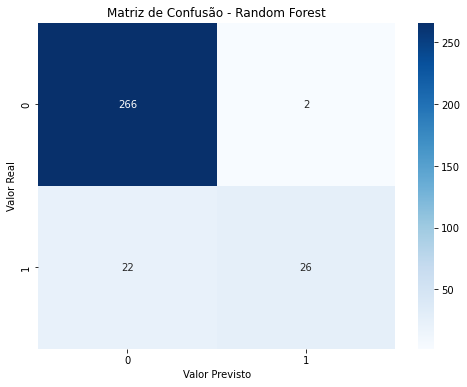

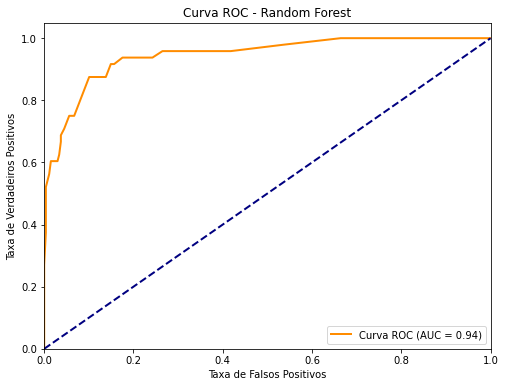

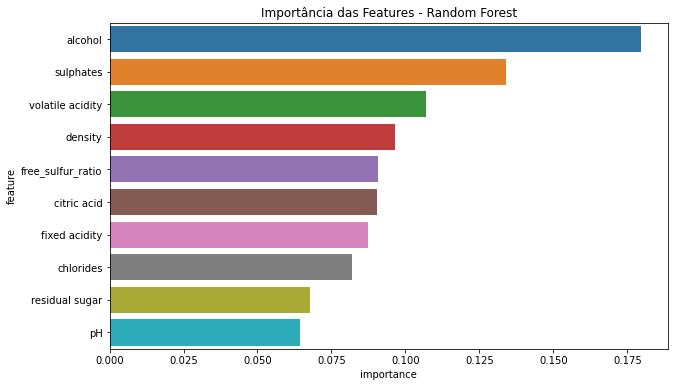


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       268
           1       0.93      0.54      0.68        48

    accuracy                           0.92       316
   macro avg       0.93      0.77      0.82       316
weighted avg       0.92      0.92      0.92       316



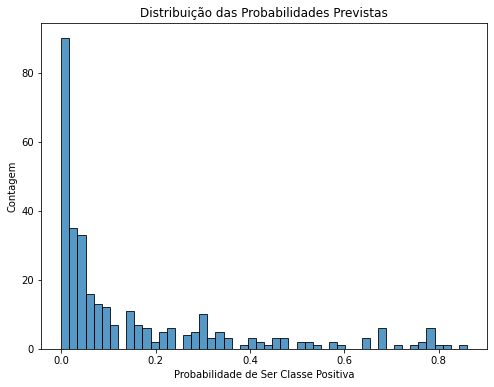

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Fazer previsões
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

# 1. Matriz de Confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto')
plt.show()

# 2. Curva ROC
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

# 3. Importância das Features
plt.figure(figsize=(10, 6))
importances = pd.DataFrame({
    'feature': df.drop('quality', axis=1).columns,
    'importance': rfc.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=importances)
plt.title('Importância das Features - Random Forest')
plt.show()

# 4. Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# 5. Distribuição das Probabilidades
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, bins=50)
plt.title('Distribuição das Probabilidades Previstas')
plt.xlabel('Probabilidade de Ser Classe Positiva')
plt.ylabel('Contagem')
plt.show()

## Precision (Precisão):
Classe 0: 0.92 = 92% dos vinhos que o modelo classificou como baixa/média qualidade realmente eram
Classe 1: 0.93 = 93% dos vinhos que o modelo classificou como alta qualidade realmente eram
## Recall (Sensibilidade):
Classe 0: 0.99 = 99% dos vinhos que realmente são de baixa/média qualidade foram identificados corretamente
Classe 1: 0.54 = Apenas 54% dos vinhos que realmente são de alta qualidade foram identificados corretamente
## F1-score (média harmônica entre precision e recall):
Classe 0: 0.96 = Excelente desempenho geral para vinhos de baixa/média qualidade
Classe 1: 0.68 = Desempenho moderado para vinhos de alta qualidade